In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score

In [2]:
df=pd.read_csv("E:\data analyze tools\e-commerce 7-7\ecommerce_product_dataset.csv")
df

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Throw Blanket,Blankets,207.72,2.3,1973,16,0.46,325,2024-02-13,Baton Rouge
996,997,Fleece Blanket,Blankets,268.60,3.2,841,201,0.39,1546,2023-07-01,Worcester
997,998,Throw Blanket,Blankets,92.74,2.8,3454,880,0.02,1295,2023-10-29,Raleigh
998,999,Weighted Blanket,Blankets,152.28,1.3,2850,752,0.34,1962,2023-10-28,Nashville


In [6]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductID      1000 non-null   int64  
 1   ProductName    1000 non-null   object 
 2   Category       1000 non-null   object 
 3   Price          1000 non-null   float64
 4   Rating         1000 non-null   float64
 5   NumReviews     1000 non-null   int64  
 6   StockQuantity  1000 non-null   int64  
 7   Discount       1000 non-null   float64
 8   Sales          1000 non-null   int64  
 9   DateAdded      1000 non-null   object 
 10  City           1000 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [10]:
df.describe()

,ProductID,Price,Rating,NumReviews,StockQuantity,Discount,Sales
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,253.77551,3.025600,2498.753000,495.395000,0.251640,1011.037000
std,288.819436,141.40362,1.151004,1463.241871,292.799253,0.146455,582.113466
min,1.000000,10.11000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,250.750000,133.09250,2.100000,1201.750000,241.750000,0.130000,502.000000
50%,500.500000,251.31000,3.100000,2476.000000,505.000000,0.250000,998.000000
75%,750.250000,375.82750,4.000000,3797.500000,743.500000,0.380000,1540.000000
max,1000.000000,499.74000,5.000000,4994.000000,993.000000,0.500000,1997.000000


In [12]:
df.isna().sum()

ProductID        0
ProductName      0
Category         0
Price            0
Rating           0
NumReviews       0
StockQuantity    0
Discount         0
Sales            0
DateAdded        0
City             0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df['ProductName'].value_counts()

Biography        22
Mountain Bike    19
Throw Blanket    18
Denim Jacket     17
Vitamin D        15
                 ..
Rain Jacket       5
Winter Coat       5
Cuticle Oil       5
Fantasy Book      4
Pillar Candle     4
Name: ProductName, Length: 100, dtype: int64

<Axes: >

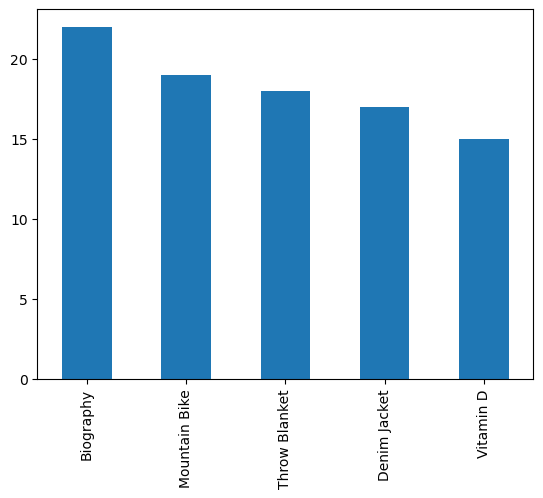

In [15]:
df['ProductName'].value_counts().head().plot(kind='bar')

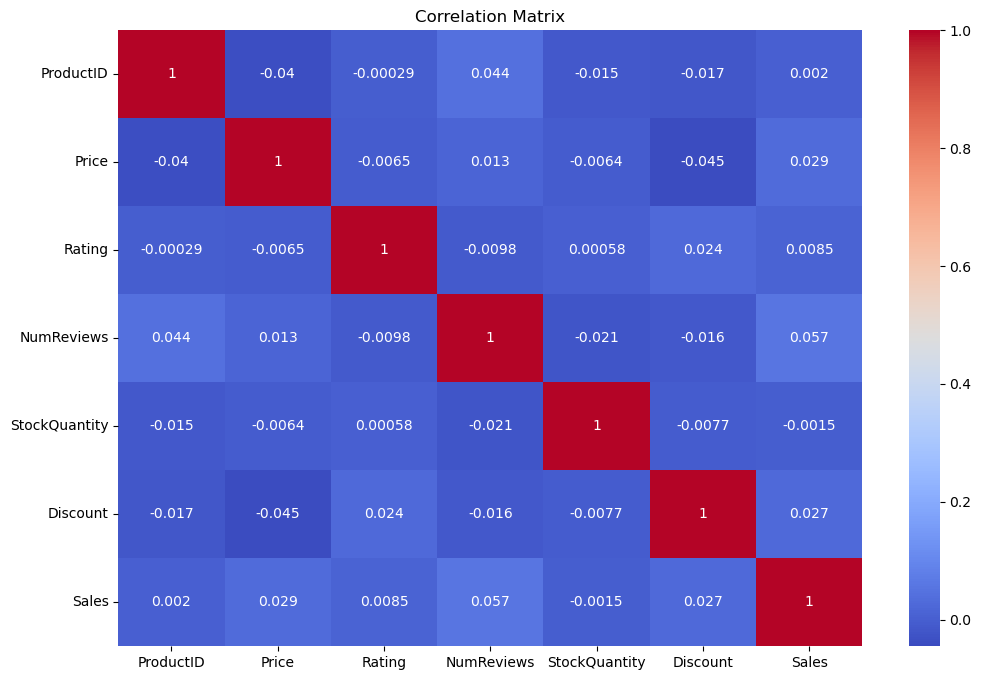

In [17]:

numeric_cols = df.select_dtypes(include=np.number).columns  # لاختيار القيم الرقمية
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [4]:
!pip install wordcloud

                                              0.0/300.2 kB ? eta -:--:--
     ---                                   30.7/300.2 kB 640.0 kB/s eta 0:00:01
     -----                                 41.0/300.2 kB 393.8 kB/s eta 0:00:01
     -----------                           92.2/300.2 kB 744.7 kB/s eta 0:00:01
     ---------------                      133.1/300.2 kB 782.7 kB/s eta 0:00:01
     -------------------                  163.8/300.2 kB 817.0 kB/s eta 0:00:01
     -------------------------------        245.8/300.2 kB 1.0 MB/s eta 0:00:01
     -------------------------------------- 300.2/300.2 kB 1.0 MB/s eta 0:00:00


(-0.5, 799.5, 399.5, -0.5)

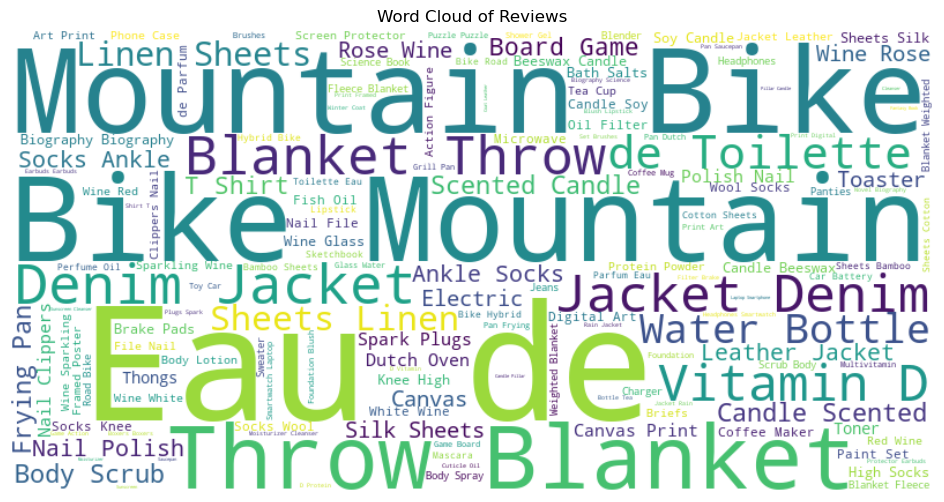

In [5]:
from wordcloud import WordCloud # to generate immage using product name

reviews_text = ' '.join(df['ProductName'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews')
plt.axis('off')